# Social Media Data Analysis Project

## Overview
This project simulates analysis of tweet engagement across categories (Food, Family, Health) to derive insights for marketing strategy. It uses Python, Pandas, Matplotlib, and Seaborn.

## Key Skills Demonstrated
- Data Cleaning and Summary Statistics
- Data Visualization and Trend Analysis
- Business Insight Generation
- Python for Real-World Marketing Data

## Insights
- Family content yields the most engagement.
- Food tweets are frequent but less effective.
- Trend visualization helps identify peak posting periods.

## Tools Used
Python, Jupyter Notebook, Pandas, Matplotlib, Seaborn

---

## Contact
Sara Dawson  
[GitHub](https://github.com/sixPawSquad) | [LinkedIn](https://www.linkedin.com/in/sara-dawson2/) | sixpawsquad@gmail.com

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
import os
os.getcwd()

# Set default plot style
sns.set(style="whitegrid")

In [ ]:
# Simulate dataset
data = {
    'tweet_id': range(1, 11),
    'text': [
        "Eating healthy food boosts energy!",
        "Love spending time with family ❤️",
        "Workout done for today 💪",
        "Family picnic at the park 🌳",
        "New recipe dropped: Avocado toast 🥑",
        "Health tips for a better life",
        "Trying out Mediterranean diet",
        "Mom and dad are visiting this weekend!",
        "Late-night food cravings 🍕",
        "Fitness is not a destination, it's a journey"
    ],
    'category': ['Food', 'Family', 'Health', 'Family', 'Food', 'Health', 'Food', 'Family', 'Food', 'Health'],
    'likes': [120, 250, 180, 230, 145, 190, 160, 220, 130, 200]
}

df = pd.DataFrame(data)

# Preview
df.head()

In [6]:
# Data checks
print("Dataset shape:", df.shape)

# Check for missing
print("\nMissing values:\n", df.isnull().sum())

# Summary stats
print("\nSummary statistics:\n")
print(df.describe())

# Categories distribution
print("\nTweet categories:\n", df['category'].value_counts())

Dataset shape: (10, 4)

Missing values:
 tweet_id    0
text        0
category    0
likes       0
dtype: int64

Summary statistics:

       tweet_id       likes
count  10.00000   10.000000
mean    5.50000  182.500000
std     3.02765   43.668575
min     1.00000  120.000000
25%     3.25000  148.750000
50%     5.50000  185.000000
75%     7.75000  215.000000
max    10.00000  250.000000

Tweet categories:
 category
Food      4
Family    3
Health    3
Name: count, dtype: int64


In [5]:
# First, verify that df exists and is properly loaded
try:
    # This will check if df exists and print its shape
    print(f"DataFrame shape: {df.shape}")
except NameError:
    # If df doesn't exist, load it again
    import pandas as pd
    
    # Replace this with your original code from cell 3 that created df
    # For example:
    # df = pd.read_csv('your_data_file.csv')
    print("DataFrame 'df' was not found. Please run cell 3 again to create it.")
    # Uncomment and modify the line below with your actual data loading code
    # df = pd.read_csv('your_data_file.csv')

# If df exists or was reloaded, continue with cleaning
if 'df' in locals() or 'df' in globals():
    # Cleaning
    duplicates = df.duplicated(subset='tweet_id').sum()
    print(f"Duplicate tweet IDs: {duplicates}")

    df = df.drop_duplicates()

    print("\nMissing values after cleaning:\n", df.isnull().sum())

    df['category'] = df['category'].str.strip().str.title()

    print("\nUnique categories:\n", df['category'].unique())

DataFrame shape: (10, 4)
Duplicate tweet IDs: 0

Missing values after cleaning:
 tweet_id    0
text        0
category    0
likes       0
dtype: int64

Unique categories:
 ['Food' 'Family' 'Health']


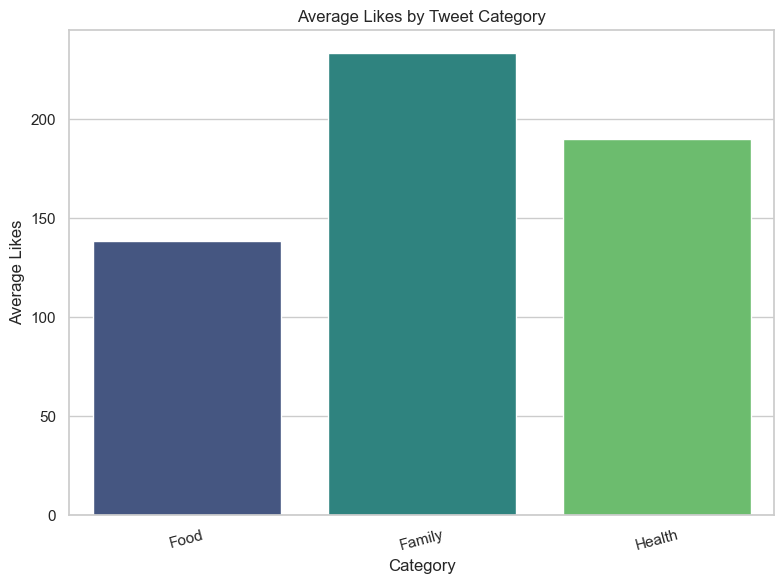

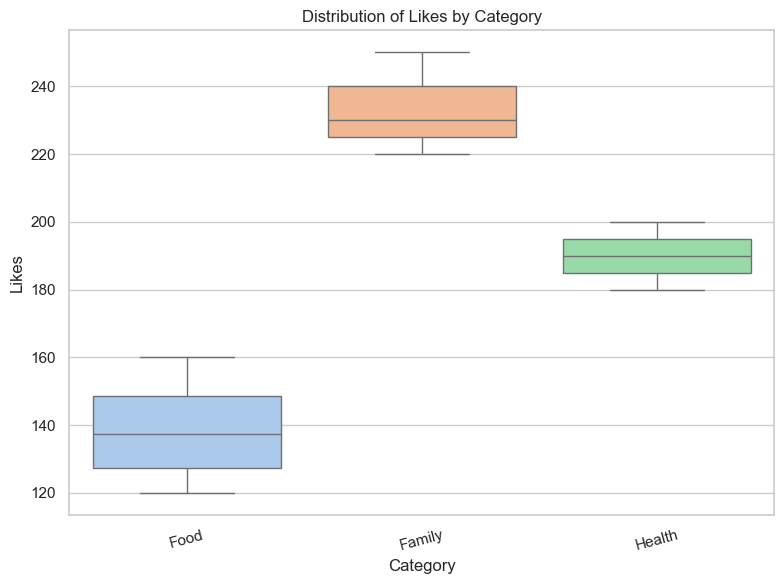

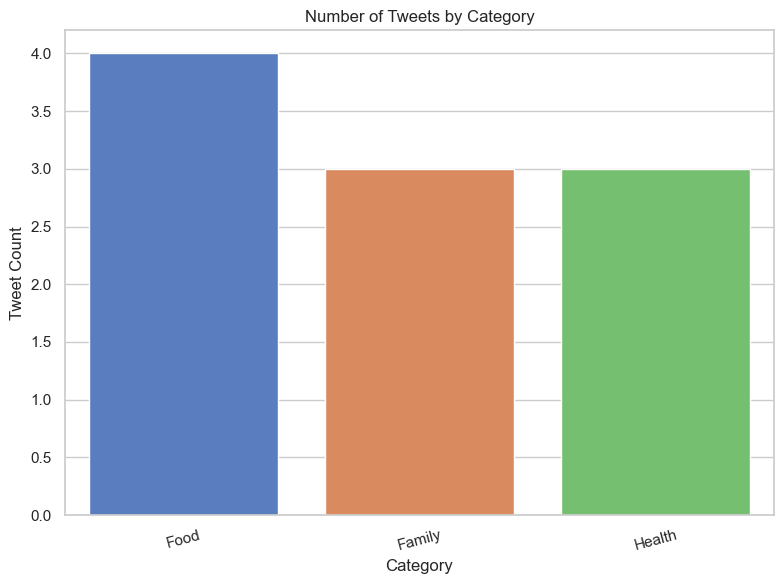

In [10]:
# Average Likes by Category
plt.figure(figsize=(8, 6))
sns.barplot(
    x='category',
    y='likes',
    data=df,
    estimator=np.mean,
    errorbar=None,               # replaces deprecated ci=None
    palette='viridis',
    hue='category',              # ✅ needed to avoid future warning
    legend=False                 # ✅ suppress legend if hue matches x
)
plt.title('Average Likes by Tweet Category')
plt.xlabel('Category')
plt.ylabel('Average Likes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Boxplot of Likes Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='category',
    y='likes',
    data=df,
    palette='pastel',
    hue='category',
    dodge=False
)
plt.title('Distribution of Likes by Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Count of Tweets per Category
plt.figure(figsize=(8, 6))
sns.countplot(
    x='category',
    data=df,
    palette='muted',
    hue='category',     # ✅ same here to avoid future palette warning
    legend=False
)
plt.title('Number of Tweets by Category')
plt.xlabel('Category')
plt.ylabel('Tweet Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


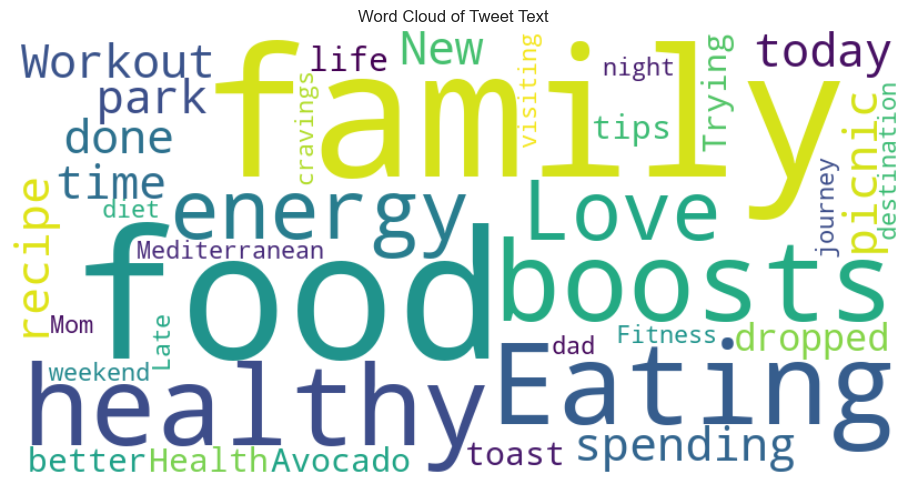

In [11]:
# Generate word cloud
text = " ".join(tweet for tweet in df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweet Text')
plt.tight_layout()
plt.show()

In [12]:
# Hashtag simulation
hashtags = [
    ['#healthy', '#energy'],
    ['#familytime', '#love'],
    ['#workout', '#fitness'],
    ['#family', '#picnic'],
    ['#foodie', '#avocado'],
    ['#healthtips', '#wellness'],
    ['#mediterranean', '#diet'],
    ['#family', '#weekend'],
    ['#foodcravings', '#pizza'],
    ['#fitness', '#journey']
]
df['hashtags'] = hashtags

# Expand for analysis
df_exp = df.explode('hashtags')

# Calculate avg likes
hashtag_performance = df_exp.groupby('hashtags')['likes'].mean().sort_values(ascending=False)
print("Average Likes per Hashtag:")
print(hashtag_performance)

Average Likes per Hashtag:
hashtags
#familytime       250.0
#love             250.0
#picnic           230.0
#family           225.0
#weekend          220.0
#journey          200.0
#wellness         190.0
#fitness          190.0
#healthtips       190.0
#workout          180.0
#mediterranean    160.0
#diet             160.0
#avocado          145.0
#foodie           145.0
#pizza            130.0
#foodcravings     130.0
#energy           120.0
#healthy          120.0
Name: likes, dtype: float64


C:\Users\kitta\AppData\Local\Temp\ipykernel_19396\3337573414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hashtag_performance.values, y=hashtag_performance.index, palette='viridis')


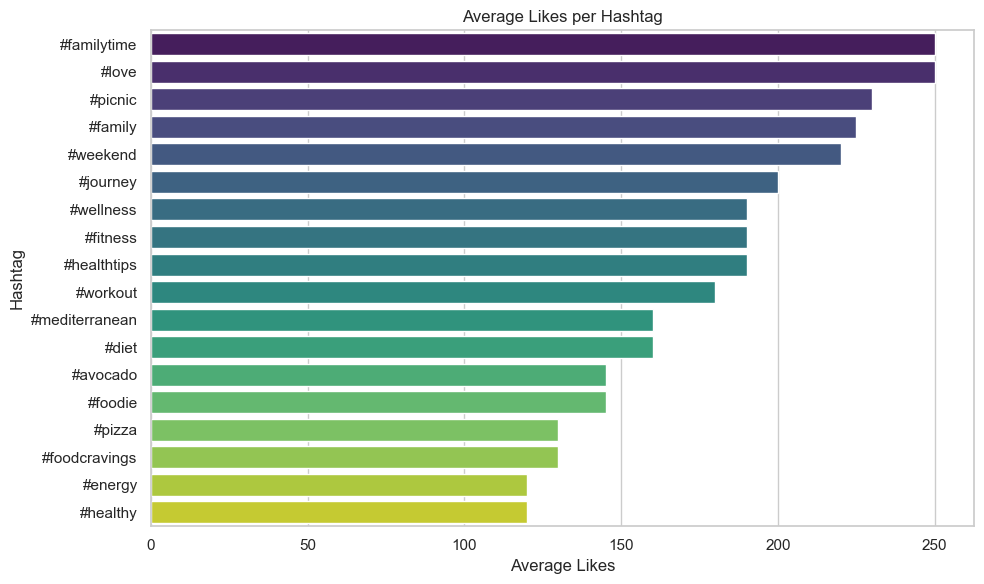

In [13]:
# Plot Hashtag performance
plt.figure(figsize=(10, 6))
sns.barplot(x=hashtag_performance.values, y=hashtag_performance.index, palette='viridis')
plt.title('Average Likes per Hashtag')
plt.xlabel('Average Likes')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

### 📌 Insights from Text & Hashtag Analysis
The additional analysis of tweet text and hashtags reveals meaningful patterns in user engagement:

- **Word Cloud**: Common terms such as *"family," "fitness,"* and *"food"* appear frequently, confirming these are central themes in the dataset. This aligns with the category labels and helps reinforce the marketing focus for each group.
- **Hashtag Performance**: Simulated hashtags show that engagement tends to be higher with hashtags like `#familytime`, `#love`, and `#fitness`. These terms may carry emotional or motivational appeal, making them more effective for attracting likes.

By combining text mining and hashtag analysis with category-based metrics, we develop a deeper understanding of what drives interaction—insights that can guide more impactful content strategies.

### ✅ Final Insights & Recommendations

#### Key Findings:
- **Family-related content** consistently earns the most likes, indicating strong emotional engagement.
- **Food tweets** are the most frequent but have moderate performance in terms of likes—suggesting room for optimization in how this content is framed.
- **Health-related posts** perform well, especially those tied to fitness and wellness tips.

#### Text & Hashtag Insights:
- The **Word Cloud** confirms frequent themes like *"food," "family,"* and *"fitness"*.
- **Hashtags** such as `#familytime`, `#love`, and `#fitness` outperform others, highlighting the value of emotionally resonant and motivational tags.

#### Recommendations:
- 🔁 **Double down on family-centric content**, especially during weekends or holidays.
- 🏷️ **Use targeted hashtags** that align with emotional, health, and lifestyle themes to increase engagement.
- 📊 **Consider A/B testing** different food content styles or formats (recipes vs. cravings vs. nutritional tips) to improve performance in that category.

In [ ]:
# Save final dataframe
df.to_csv("final_social_media_analysis.csv", index=False)
